<div style="background-color:#000;"><img src="pqn.png"></img></div>

This code downloads financial data for a set of symbols, computes portfolio and benchmark returns, and calculates the tracking error. It uses yfinance to retrieve adjusted close prices, computes daily percentage returns, and isolates the benchmark returns. The code then calculates the portfolio returns as the sum of individual stock returns and determines the excess returns over the benchmark. Finally, it computes the tracking error and visualizes the portfolio, benchmark, and excess returns over time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import warnings

In [2]:
warnings.filterwarnings("ignore")

Define the list of symbols for which financial data will be downloaded

In [3]:
symbols = [
    "XLE",
    "XLF",
    "XLU",
    "XLI",
    "GDX",
    "XLK",
    "XLV",
    "XLY",
    "XLP",
    "XLB",
    "SPY"
]

Download adjusted close prices for the defined symbols from yfinance, starting from 2020-01-01

In [4]:
data = yf.download(symbols, start="2020-01-01")["Adj Close"]

[*********************100%%**********************]  11 of 11 completed


Compute daily percentage returns for the downloaded data and drop missing values

In [5]:
returns = data.pct_change().dropna()

Separate the benchmark returns (SPY) from the portfolio returns

In [6]:
benchmark_returns = returns.pop("SPY")

Calculate portfolio returns as the sum of individual stock returns

In [7]:
portfolio_returns = returns.sum(axis=1)

Calculate excess returns of the portfolio over the benchmark

In [8]:
excess_returns = portfolio_returns - benchmark_returns

Display the first few rows of the portfolio returns

In [9]:
portfolio_returns.head()

Date
2020-01-03   -0.065825
2020-01-06    0.019263
2020-01-07   -0.015849
2020-01-08   -0.018535
2020-01-09    0.044010
dtype: float64

Compute the tracking error as the standard deviation of excess returns

In [10]:
tracking_error = excess_returns.std()
tracking_error

0.11853774041100189

Visualize the portfolio, benchmark, and excess returns over time

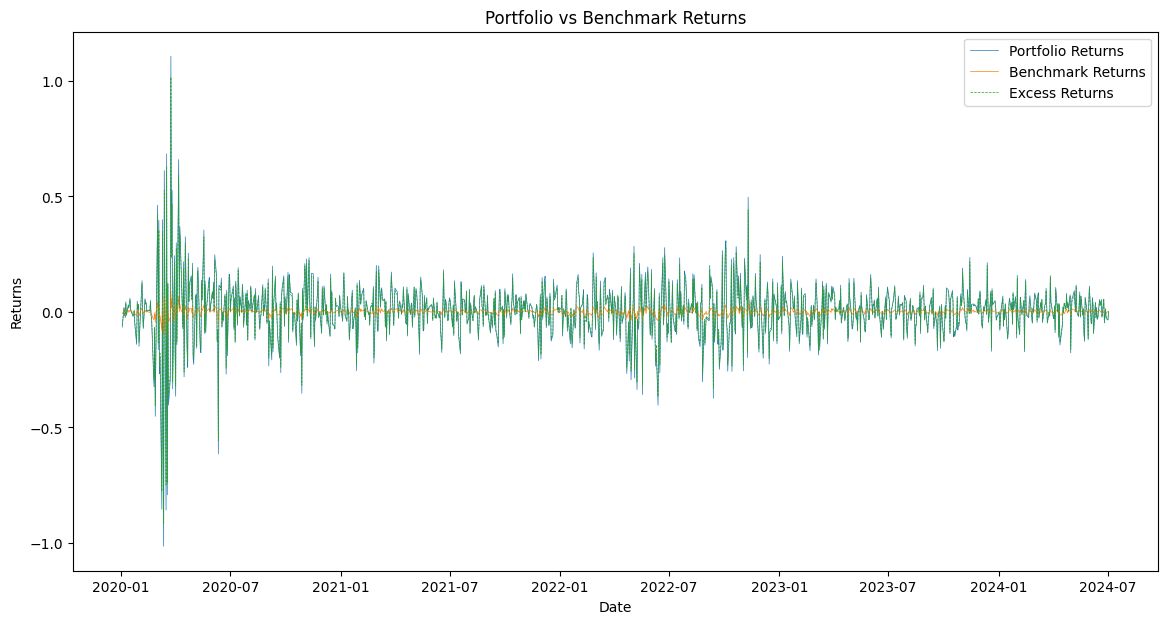

In [11]:
plt.figure(figsize=(14, 7))
plt.plot(portfolio_returns.index, portfolio_returns, label='Portfolio Returns', lw=0.5)
plt.plot(benchmark_returns.index, benchmark_returns, label='Benchmark Returns', lw=0.5)
plt.plot(excess_returns.index, excess_returns, label='Excess Returns', linestyle='--', lw=0.5)
plt.legend()
plt.title('Portfolio vs Benchmark Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

<a href="https://pyquantnews.com/">PyQuant News</a> is where finance practitioners level up with Python for quant finance, algorithmic trading, and market data analysis. Looking to get started? Check out the fastest growing, top-selling course to <a href="https://gettingstartedwithpythonforquantfinance.com/">get started with Python for quant finance</a>. For educational purposes. Not investment advise. Use at your own risk.